# Анализ успешности игры

## Получение и изучение данных

### Поставленная задача и исходные данные

**Заказчик: интернет-магазин компьютерных игр «Стримчик»**

Из открытых источников доступны исторические данные:
- о продажах игр,
- оценки пользователей и экспертов,
- жанры,
- платформы (например, Xbox или PlayStation).

<ins>**Задача: выявить определяющие успешность игры закономерности.**</ins> Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Предоставлены данные до 2016 года. Задача поставлена в декабре 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Обзор данных

<ins>Импорт библиотек</ins>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
pd.set_option('display.max_columns', None)

<ins>Чтение файлов с данными</ins>

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

<ins>Изучение общей информации о данных</ins>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Наблюдения:
- пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`
- наименования столбцов включает в себя и прописные и строчные буквы
- тип данных в столбце `User_Score`(оценка пользователей) с `object` необходимо заменить на `float64`, замена типа следует из наименования столбца
- тип данных в столбце `Year_of_Release`(год выпуска) с `float64`необходимо заменить на `Int64`, замена типа следует из наименования столбца
- при анализе методом `describe` аномалий не выявлено

## Подготовка данных

### Замена наименований столбцов

Приведем наименования столбцов к нижнему регистру

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Приведение данных к нужным типам

- тип данных в столбце `user_score`(оценка пользователей) с `object` необходимо заменить на `float64`, замена типа следует из наименования столбца

Для начала обратим внимание на значения "tbd" в столбце `user_score`, расшифровывается - To Be Determined, то есть "Будет определено". Предполагаю, на момент составления датасета рейтинг был неизвестен, поэтому заменим "tbd" на NaN при замене типа данных.

In [8]:
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Используем метод `to_numeric`, он превращает значения столбца в числовой тип `float64` (вещественное число). У метода `to_numeric` есть параметр `errors`, зададим `errors='coerce'` — некорректные значения принудительно заменяются на NaN для удобства дальнейшей работы.

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

- тип данных в столбце `year_of_release`(год выпуска) с `float64`необходимо заменить на `Int64`, замена типа следует из наименования столбца

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

### Обработка пропусков

Пропуски в столбцах
- `name` — название игры
- `year_of_release` — год выпуска
- `genre` — жанр игры
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)
- `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Определим долю пропусков в процентах к значениям без пропусков а также взглянем на строки с пропусками.

In [11]:
columns_with_NaN = ['name','year_of_release', 'genre',
                    'critic_score', 'user_score', 'rating']
for column in columns_with_NaN:
    print (f'Столбец {column}')
    print (f'Доля пропущенных значений в столбце {column}: {df[column].isna().mean():.2%}')
    display(df[df[column].isna()==True].head())

Столбец name
Доля пропущенных значений в столбце name: 0.01%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Столбец year_of_release
Доля пропущенных значений в столбце year_of_release: 1.61%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Столбец genre
Доля пропущенных значений в столбце genre: 0.01%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Столбец critic_score
Доля пропущенных значений в столбце critic_score: 51.32%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Столбец user_score
Доля пропущенных значений в столбце user_score: 54.59%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Столбец rating
Доля пропущенных значений в столбце rating: 40.48%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


- `name`(название игры) - доля пропусков мала, объект типа `object`, логичной замены пропусков нет, к тому же пропуски в большинстве столбцов датасета при пропущенных значениях в данном. Думаю, что причина пропусков в данном столбце - программный сбой. Удалим строки с пропускам в данном столбце.
- `year_of_release` (год выпуска) - логичной замены нет, чтобы не искажать картину оставим без изменений. Возможные причины пропусков - человеческий фактор, заполняющий либо не знал год, либо счёл этот параметр необязательным
- `genre` (жанр игры) - пропуски в тех же строках, что и в стобце `name`(название игры), причина та же. Удалим строки с пропусками в данном столбце.
- `critic_score` (оценка критиков)- логичной замены нет, чтобы не искажать картину оставим без изменений. Возможные причины пропусков - отсутствие информации по оценкам у автора датасета.
- `user_score` (оценка пользователей) - выводы аналогичны `critic_score`.
- `rating` (рейтинг от ESRB, эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию). Возможные причины пропусков - игра не имеет данного рейтинга, т.к. подходит для всех возрастных категорий, заменим пропуски на *unknown* - неизвестно. 

Выполним вышеперечисленные действия.

Удаление строк

In [12]:
try:
    df = df.dropna(subset='name')
except:
    df = df.dropna(subset=['name'])

Замена пропусков для категориальных значений в столбце `rating`

In [13]:
df['rating'] = df['rating'].fillna('unknown')

In [14]:
df['rating'].value_counts()

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

### Расчёт суммарных продажи во всех регионах

Напомним, с какими данными работаем:
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `sum_sales` (миллионы проданных копий).

In [15]:
df['sum_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


## Исследовательский анализ данных

### Количество игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы.

Создание сводной таблицы с необходимыми данными:
- `year_of_release` - год выпуска
- `count_games` - кол-во игр

In [16]:
df_year = (df.pivot_table(index='year_of_release',
                          values='name',
                          aggfunc='count')
                          .rename(columns={'name':'count_games'})
                          .reset_index())
df_year.head(15)

,year_of_release,count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Построим для наглядности столбчатую диаграмму и обычный график зависимости кол-ва игр от года выпуска.

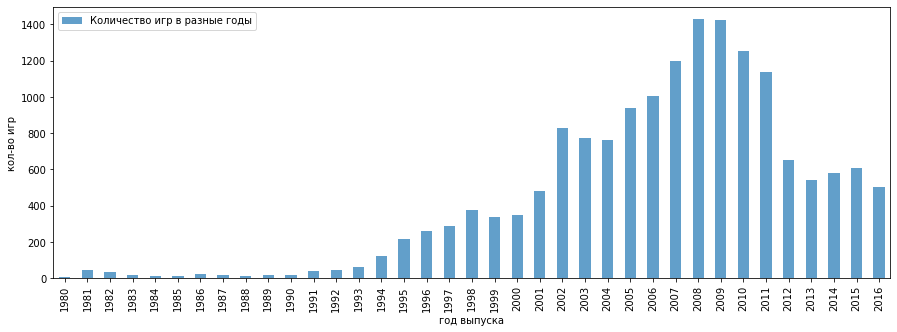

In [17]:
df_year.plot(kind='bar',
             x='year_of_release',
             y='count_games',
             figsize=(15, 5),
             alpha=0.7,
             ylabel='кол-во игр',
             xlabel='год выпуска',
             label='Количество игр в разные годы');

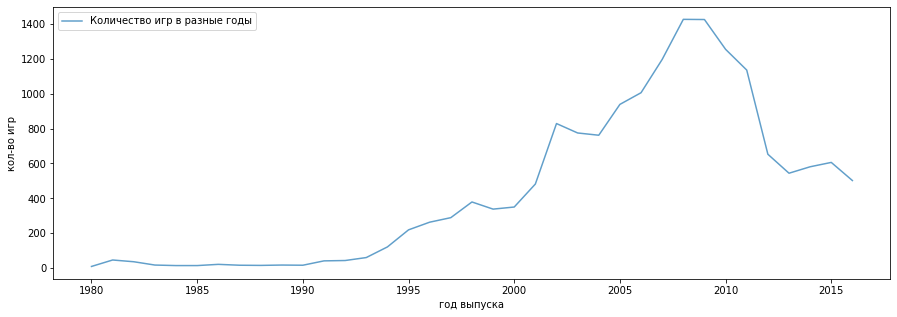

In [18]:
df_year.plot(x='year_of_release',
             y='count_games',
             figsize=(15, 5),
             alpha=0.7,
             ylabel='кол-во игр',
             xlabel='год выпуска',
             label='Количество игр в разные годы');

Для опредения важны ли данные за все периоды дополнительно построим диаграмму размаха.

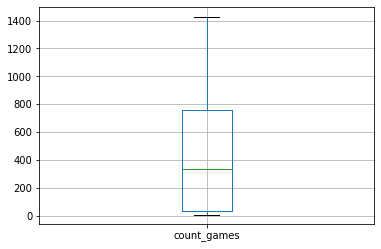

In [19]:
df_year.boxplot(column = 'count_games');

Судя по диаграмме размаха важны данные за все периоды, т.к. всё количество игр лежит в пределах усов. Однако здесь судить только по диаграмме размаха нельзя.

По столбчатой диаграмме видно:
- до середины 90-х годов кол-во выпускаемых игр было мало и явный прогресс выпуска не наблюдался
- начиная с середины 90-х годов до конца нулевых наблюдается значительный рост выпуска
- с конца нулевых резкий спад
Всё вышеперечисленное связано с развитием и доступностью компьютерных технологий, а также появлением игр на мобильных устройствах.

Напрашивается вывод, что данные до 1994 года не так полезны для анализа, однако, оставим их, чтобы была возможность спрогнозировать, что будет с игровой компьютерной индустрией при разработке новых информационных технологий в будущем.

### Продажи по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Создание сводной таблицы с необходимыми данными:
- `sum_sales` - суммарные продажи во всех регионах (миллионы проданных копий)
- `platform` — платформа
- `year_of_release` - год выпуска

Выберем платформы с наибольшими суммарными продажами

In [20]:
plat_sales = (df.pivot_table(index='platform',
                  aggfunc={'sum_sales':'sum'})
                  .sort_values(by = 'sum_sales', ascending=False)
                  .reset_index())                  
plat_sales.head(10)

,platform,sum_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Построим распределение по годам для первых шести.

Для удобства дальнейшей работы создадим функцию `plot_sum_year`:
- `df_1` - исходный датасет
- `df_2` - отсортированный датасет по платформам с наибольшими суммарными продажами
- `xmin` - левый предел по оси **x**
- `locmax` - максимальный номер строки для среза

Функция выполняет построение кривых распределения суммарных продаж по годам для всех платформ среза на одном графике (в одних осях).

In [21]:
def plot_sum_year(df_1, df_2, xmin, locmax):
    ax = (df_1.loc[df_1['platform'] == df_2.loc[0,'platform']]
        .pivot_table(index='year_of_release', aggfunc={'sum_sales':'sum'})
        .reset_index()
        .plot(x='year_of_release',
              y='sum_sales',
              style='o-',
              label='PS2'))
    
    for plat in list(df_2.loc[1:locmax,'platform']):
        (df_1.loc[df_1['platform'] == plat]
        .pivot_table(index='year_of_release', aggfunc={'sum_sales':'sum'})
        .reset_index()
        .plot(x='year_of_release',
              y='sum_sales',
              style='o-',
              figsize=(20, 10),
              ax=ax,
              label=plat,
              grid=True,
              xticks = range(xmin,2016),
              yticks = range(0,220,10),
              ylabel='суммарные продажи',
              xlabel='год'))
    
    plt.title('Распределение платформ с наибольшими суммарными продажами по годам')
    return

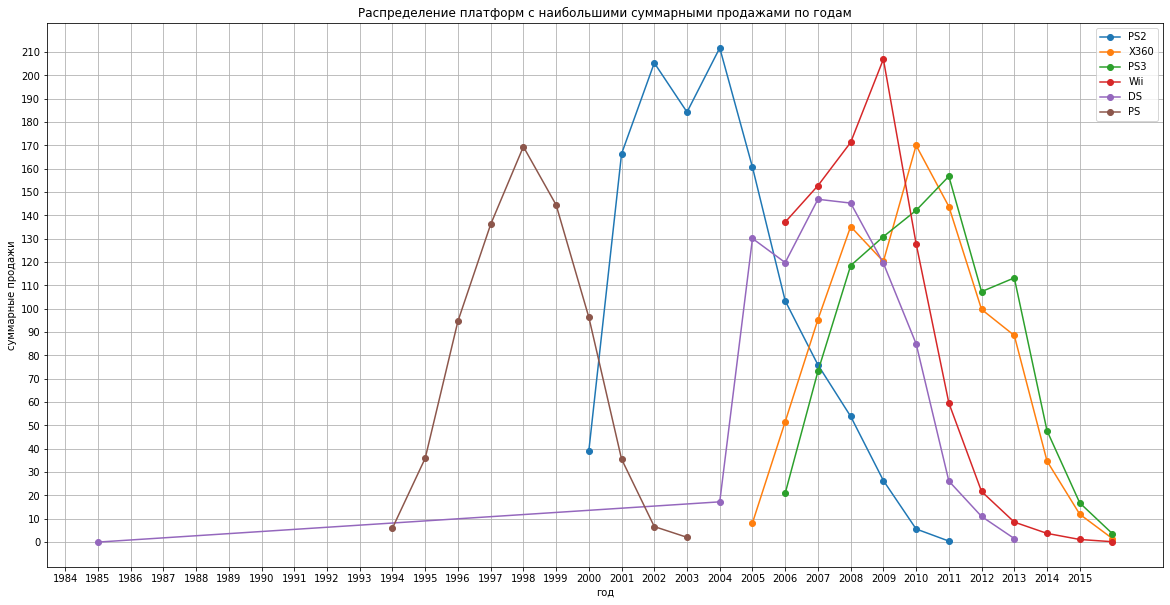

In [22]:
plot_sum_year (df, plat_sales, 1984, 5)

In [23]:
df[df['platform'] == 'DS'].sort_values('year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.0,NaN,NaN,unknown,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.0,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.0,NaN,NaN,unknown,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.0,NaN,NaN,unknown,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.0,NaN,NaN,unknown,0.19


Итог.

- Примерно за 5 лет появляются новые платформы, а старые исчезают через 5 лет после появления новой (на графике выше это видно по кривым для платформ PS, PS2, PS3).
- Срок жизни платформы около 10 лет.
- До 1994 года данные по кривой платформы DS в анализ не берем, т.к. в это время игровая компьютерная индустрия была непопулярна.
- В данных обнаружена опечатка. Дело в том, что игровая консоль DS (Nintendo DS) была выпущена только лишь в 2004 году ([ссылка](https://ru.wikipedia.org/wiki/Nintendo_DS) на википедию). И действительно, если не брать эту одну игру 1984 года, то рост по этой платформе идет с 2004 года. Предполагаем, что опечатка в дате, по информации в интернете год выхода данной игры - 2010. Заменим дату для данной игры.

In [24]:
df.loc[df['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2010

### Выборка данных за актуальный период

Определим актуальный период.

В результате исследования предыдущих вопросов сделаны следующие выводы:
- до 1994 года игры были не так популярны, как после
- с 1994 до 2006 популярных платформ (с наибольшими продажами) было мало
- с 2006 года наблюдается здоровая конкуренция

Для прогноза на 2017 год возьмём выборку с 2006 до 2016 года.

In [25]:
df_act = df.query('year_of_release >= 2006')
df_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Данные за актуальный период представлены в таблице `df_act`.

Данные за предыдущие годы учитывать в работе далее не будем.

### Определение потенциально прибыльных платформ

Напомним, с какими данными работаем:
- `sum_sales` - суммарные продажи во всех регионах (миллионы проданных копий)
- `platform` — платформа
- `year_of_release` - год выпуска

Список платформ по продажам за актуальный период 

In [26]:
act_plat_sales = (df_act.pivot_table(index='platform',
                  aggfunc={'sum_sales':'sum'})
                  .sort_values(by = 'sum_sales', ascending=False)
                  .reset_index())                  
act_plat_sales.head(16)

,platform,sum_sales
0,X360,952.99
1,PS3,931.34
2,Wii,891.18
3,DS,655.37
4,PS4,314.14
5,PS2,265.80
6,3DS,257.81
7,PSP,238.63
8,PC,163.42
9,XOne,159.32


Посчитаем количество платформ в выборке

In [27]:
len(act_plat_sales)

16

Построим распределение по годам для всех платформ в выборке

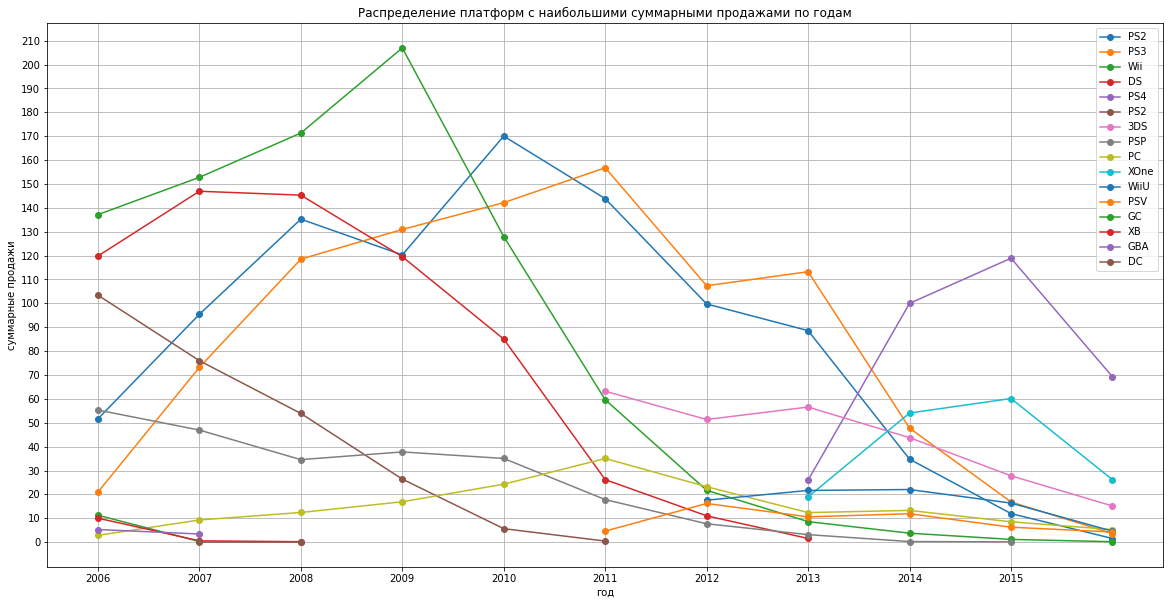

In [28]:
plot_sum_year (df_act, act_plat_sales, 2006, 15)

Пики продаж большинства игр со всех платформ с 2008 по 2012 гг.

К концу 2016 года наблюдается спад продаж для всех платформ.

Лидирует по продажам платформа **PS4**

Потенциально прибыльные платформы:
- PS4
- XOne
- 3DS

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Напомним, с какими данными работаем:
- `sum_sales` - суммарные продажи во всех регионах (миллионы проданных копий)
- `platform` — платформа
- `year_of_release` - год выпуска

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Напишем функцию `boxplot_sum_plat`, на вход которой подаётся датасет с выбранными платформами, для удобства дальнейшей работы

In [29]:
def boxplot_sum_plat (query_plat, fig_x, fig_y):
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    
    plt.figure(figsize=(fig_x, fig_y))
    plt.xlim(0, 2)
    plt.xticks(np.arange(0, 2, 0.1))    
    
    sns.boxplot(data=query_plat,
                x='sum_sales',
                y='platform',
                medianprops=dict(color="red", alpha=0.7),
                boxprops=dict(linewidth=3, alpha=0.5))
    plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
    plt.xlabel('Глобальные продажи, млн проданных копий')
    plt.ylabel('Платформа')
    return

Из-за неодназначности в инструкции рассмотрим два варианта:
- 1) потенциально прибыльные платформы
- 2) самые прибыльные платформы

Для начала рассмотрим потенциально прибыльные платформы за актуальный период.

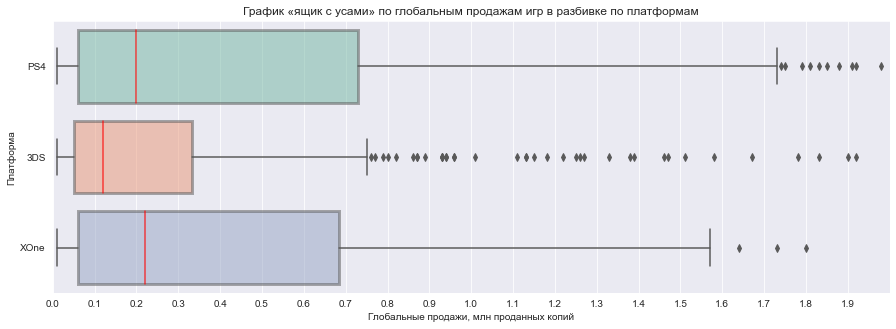

In [30]:
plat_pot = df_act.query('platform == ["PS4","XOne","3DS"]')
boxplot_sum_plat (plat_pot, 15, 5)

Теперь рассмотрим самые прибыльные платформы за актуальный период

In [31]:
act_plat_sales.head()

,platform,sum_sales
0,X360,952.99
1,PS3,931.34
2,Wii,891.18
3,DS,655.37
4,PS4,314.14


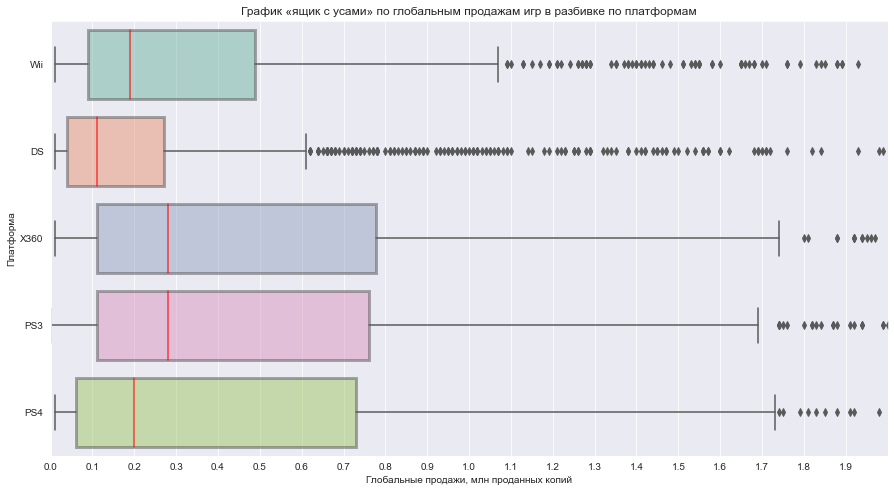

In [32]:
plat_top = df_act[df_act['platform'].isin(list(act_plat_sales.loc[:4,'platform']))]
boxplot_sum_plat (plat_top, 15, 8)

Опишем результаты за актуальный период.
- Наборы данных во всех случаях скошенны вправо (расстояние между первым квартилем и медианой заметно меньше, чем расстояние между медианой и третьим квартилем).

<ins>*Для потенциально прибыльных платформ.*</ins>

- Медианы выбранных платформ различные от 0,12 до 0,22 млн проданных копий.
- **XOne** имеет чуть меньше продаж, чем **PS4**, однако медиана больше и выбросов меньше, выглядит перспективнее. **3DS** уступает и в числе продаж и в медианном значении.

<ins>*Для самых прибыльных платформ.*</ins>

- Медианы выбранных платформ различные от 0,11 до 0,28 млн проданных копий.
- Самые успешные за актуальный период **X360** и **PS3**, максимальные медианы и межквартильный размах. **X360** выглядит наиболее прибыльным из-за большего межквартильного размаха и, как результат, более длинных "усов".
- **WII** и **DS** хотя и находились на 3-ем и 4-ом местах по суммарным продажам по анализу на основании диаграмм размаха уступают остальным и в числе продаж и в медианном значении из-за значительного числа значений за пределами усов.
- **PS4** имеет максимальный межквартильный размах, однако медиана меньше, чем у лидера **PS3**. Из-за большей скошенности данных по сравнению с **X360** ставим на третье место по прибыльности.

### Влияние отзывов на продажи внутри одной популярной платформы

Напомним, с какими данными работаем:
- `platform` — платформа
- `sum_sales` - суммарные продажи во всех регионах (миллионы проданных копий)
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)

По результатам предыдущего анализа самой популярной платформой признана **PS3**

Посмотрим, как влияют на продажи внутри платформы отзывы пользователей и критиков.

Построим диаграммы рассеяния между продажами и отзывами пользователей и критиков.

In [33]:
def scat_sum_score (plat, score):
    df_act[df_act['platform'] == plat].plot(figsize=(10, 5),
                                            kind='scatter',
                                            x=score,
                                            y='sum_sales',
                                            grid=True,
                                            color = 'lightseagreen',
                                            alpha=0.2,
                                            legend = True)
    plt.ylabel('Суммарные продажи, млн копий')
    if score == 'critic_score':
        plt.title('Диаграмма рассеяния между продажами и отзывами критиков')
        plt.xlabel('Оценка критиков')
    else:
        plt.title('Диаграмма рассеяния между продажами и отзывами пользователей')
        plt.xlabel('Оценка пользователей')
    plt.show()
    return

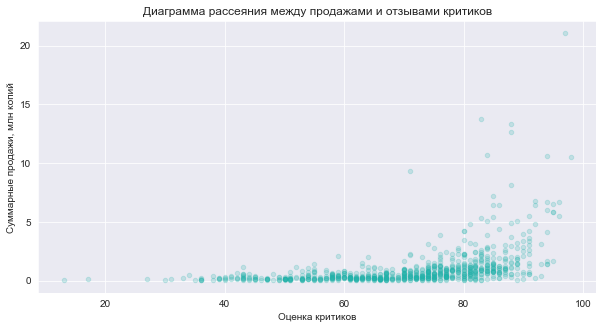

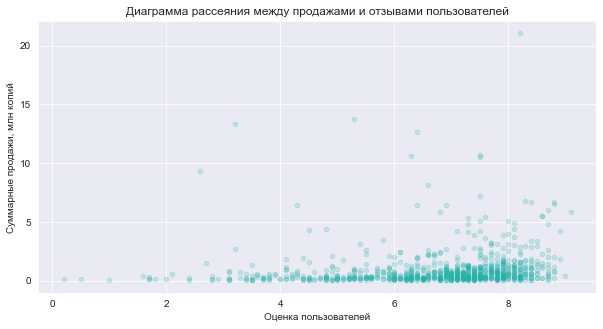

In [34]:
scat_sum_score ('PS3','critic_score')
scat_sum_score ('PS3','user_score')

- Между оценкой критиков и продажами средняя прямая зависимость.
- Между оценкой пользователей и продажами слабая прямая зависимость.

Посчитаем корреляцию между отзывами и продажами.

In [35]:
df_act_ps3 = df_act[df_act['platform'] == 'PS3'][['critic_score','user_score', 'sum_sales']]
df_act_ps3.head(3)

,critic_score,user_score,sum_sales
16,97.0,8.2,21.05
34,83.0,5.3,13.79
37,88.0,3.2,13.33


In [36]:
for number in ('critic_score', 'user_score'):
    corr_number = df_act_ps3[number].corr(df_act_ps3['sum_sales'])
    print (f'Корреляция с продажами в столбце {number}: {corr_number.round(2)}')

Корреляция с продажами в столбце critic_score: 0.43
Корреляция с продажами в столбце user_score: 0.13


Для наглядности отобразим результат на тепловой карте корреляций

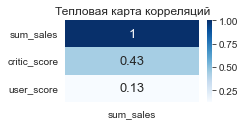

In [37]:
plt.figure(figsize=(3,1.5))
plt.title('Тепловая карта корреляций')
ax = (sns.heatmap(df_act_ps3.corr()[['sum_sales']]
                 .sort_values(by='sum_sales', ascending=False),
                 cmap="Blues", 
                 annot=True,
                 annot_kws={'size':13}))

Графический анализ подтвердился:
- корреляции положительные
- между оценкой критиков и продажами корреляция выше

**Вывод.**

Оценка критиков больше влияет на продажи - чем она выше, тем продаж больше.

Оценка пользователей практически не влияет на продажи.


### Влияние отзывов на продажи внутри других платформ и сравнение с выводом по популярной

Сравним тепловые карты корреляций для других платформ.

Тепловые карты выстроены по продажам за актуальный период, слева направо по убыванию. Слева самая продаваемая.

Сравнение тепловых карт корреляций


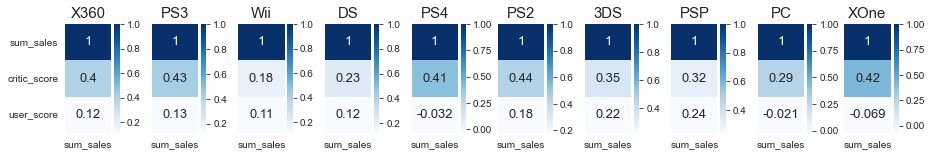

In [38]:
print ('Сравнение тепловых карт корреляций')
plat_best = list(act_plat_sales['platform'].head(10))
range_best = range(len(plat_best))
corr_best = []
ax = []
for i in range_best:
    corr_best.append('corr_best'+str(i))
    ax.append('ax'+str(i))

fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(ncols=len(plat_best), figsize=(15,2))
fig.subplots_adjust(wspace=0.5)

for c, r, a in zip(corr_best, range_best, ax):
    
    locals()[c] = (df_act[df_act['platform'] == plat_best[r]][['critic_score','user_score', 'sum_sales']]
                   .corr()[['sum_sales']].sort_values(by='sum_sales', ascending=False))

    locals()[a].set_title(plat_best[r], fontsize=15)
    if r == 0:
        sns.heatmap(locals()[c], cmap="Blues", ax=locals()[a], annot=True, annot_kws={'size':13})
        locals()[a].tick_params(rotation=0)
    else:
        sns.heatmap(locals()[c], cmap="Blues", ax=locals()[a], annot=True, annot_kws={'size':13}, yticklabels=False)

**Вывод.**

- Для всех платформ оценка критиков больше влияет на продажи (чем оценка пользователей) - чем она выше, тем продаж больше.
- Степень влияния (как положительного, так и отрицательного) на продажи оценки пользователей у разных платформ разная.
- Отрицательная корреляция близка к нулю - соответственно для **PS4**, **PC**, **XOne** оценка пользователей не влияет на продажи совсем.
- Для всех платформ с положительной корреляцией оценки пользователей и продаж зависимость ниже средней, оценка пользователей в данном случае незначительно влияет на продажи.
- Для всех платформ, кроме **Wii** и **DS**, корреляция оценки критиков и продаж средняя и влияет на продажи, у **Wii** и **DS** - ниже средней и влияет меньше.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

Создадим сводную таблицу с необходимой информацией:
- `genre` — жанр игры
- `sum_sales` - суммарные продажи во всех регионах (миллионы проданных копий) по каждому жанру

In [39]:
game_genre = (df_act.pivot_table(index='genre', values = 'sum_sales',
                  aggfunc='sum')
                  .sort_values(by = 'sum_sales', ascending=False))                  
game_genre

,sum_sales
genre,
Action,1116.67
Sports,793.85
Shooter,717.04
Misc,554.86
Role-Playing,522.40
Racing,299.00
Platform,279.74
Simulation,220.65
Fighting,188.42


Дополним табличную визуализацию графической.

Ниже представлена столбчатая диаграмма распределения продаж игр по жанрам

Text(0, 0.5, 'Суммарные продажи, млн копий')

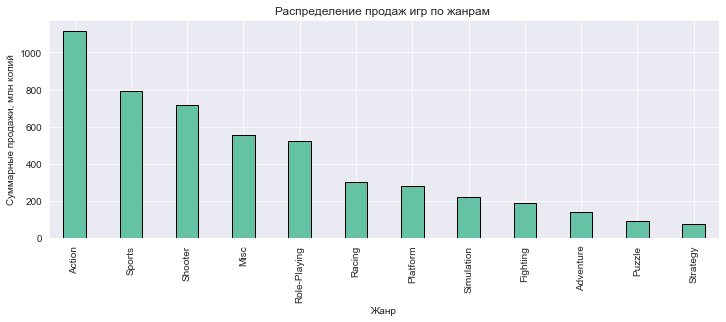

In [40]:
plt.title('Распределение продаж игр по жанрам ')
game_genre['sum_sales'].plot(kind='bar', figsize=(12,4), ec='black', width=0.4)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн копий')

Итог.

<ins>**Самые прибыльные жанры:**</ins>
- 1) Action
- 2) Sports
- 3) Shooter

Среди них явно выделяется жанр Action - самый прибыльный.

<ins>**Жанры с низкими продажами:**</ins>
- 1) Strategy
- 2) Puzzle
- 3) Adventure

Среди них явно выделяется жанр Adventure - самый прибыльный из жанров с низкими продажами.

<ins>**Наблюдается закономерность, не считая жанров Action и Adventure, все остальные жанры следуют попарно в части продаж:**</ins>
- Sports VS Shooter
- Misc VS Role-Playing
- Racing VS Platform
- Simulation VS Fighting
- Puzzle VS Strategy

## Портрет пользователя каждого региона

**В данной главе будет проводиться анализ для пользователя каждого региона (NA, EU, JP).**

### Самые популярные платформы (топ-5)

Напомним, с какими данными работаем:
- `platform` — платформа
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)

Посмотрим на самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP).

Создадим функцию, на вход которой приходит:
- `i_name` - имя диктующего столбца
- `y_max` - верхний предел по оси y для построения графиков

In [41]:
def bar_top_5 (i_name, y_max):    
    top_ = []
    _sales = []
    pos = range(3)
    col = ['lightseagreen', 'cornsilk', 'tomato']    
      
    for reg in ['na','eu','jp']:
        top_.append('top_'+reg)
        _sales.append(reg+'_sales')       
    plt.title('Сравнение долей продаж на одном графике', fontsize=15)
    
    for t,s in zip(top_, _sales):
        locals()[t] = (df_act.pivot_table(index=i_name, aggfunc={s:'sum'})
                      .sort_values(by = s, ascending=False).head())
    top_all = locals()[top_[0]].merge(locals()[top_[1]], on=i_name, how='outer').merge(locals()[top_[2]], on=i_name, how='outer')
    for s,p,c in zip(_sales, pos, col):    
        ax = plt.gca() 
        
        top_all[s].plot(kind='bar',
                        figsize=(20,5),
                        ec='black',
                        ax=ax,
                        width=0.1,
                        color=c,
                        position=p,
                        fontsize=13,
                        alpha=0.8,
                        ylim=(0,y_max)).legend(prop={'size':13})
        
    fig, axes = plt.subplots(1, 3, figsize=(25,5))
    fig.suptitle('Сравнение долей продаж на отдельных графиках', fontsize=19)  
    for t,p,c in zip(top_, pos, col):
        locals()[t].plot(kind='bar',
                         ec='black',
                         width=0.4,
                         color=c,
                         ax=axes[p],
                         fontsize=15,
                         alpha=0.8,
                         ylim=(0,y_max)).legend(prop={'size':17})
    
    display(top_all.fillna('not top'))

Вызовем функцию для получения интересующей нас информации в табличном и графическом видах.

,na_sales,eu_sales,jp_sales
platform,,,
X360,588.84,267.89,not top
Wii,486.87,258.32,68.28
PS3,390.13,327.21,79.41
DS,323.99,142.99,141.51
PS2,114.89,not top,not top
PS4,not top,141.09,not top
3DS,not top,not top,100.62
PSP,not top,not top,70.63


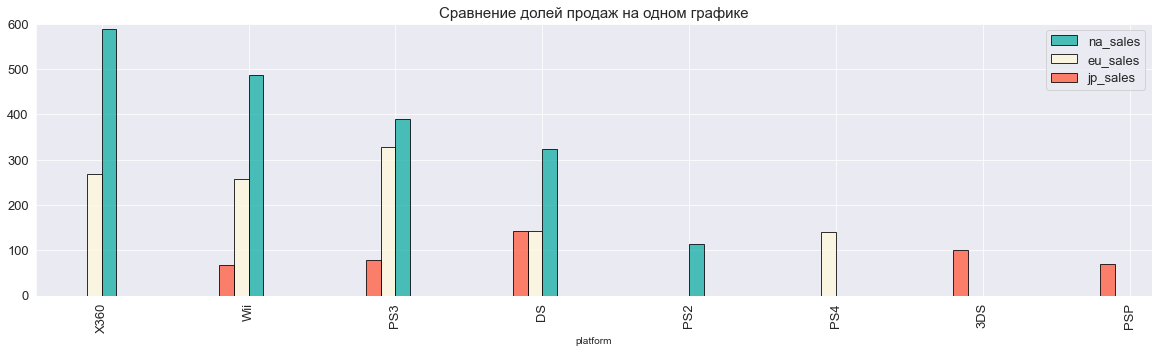

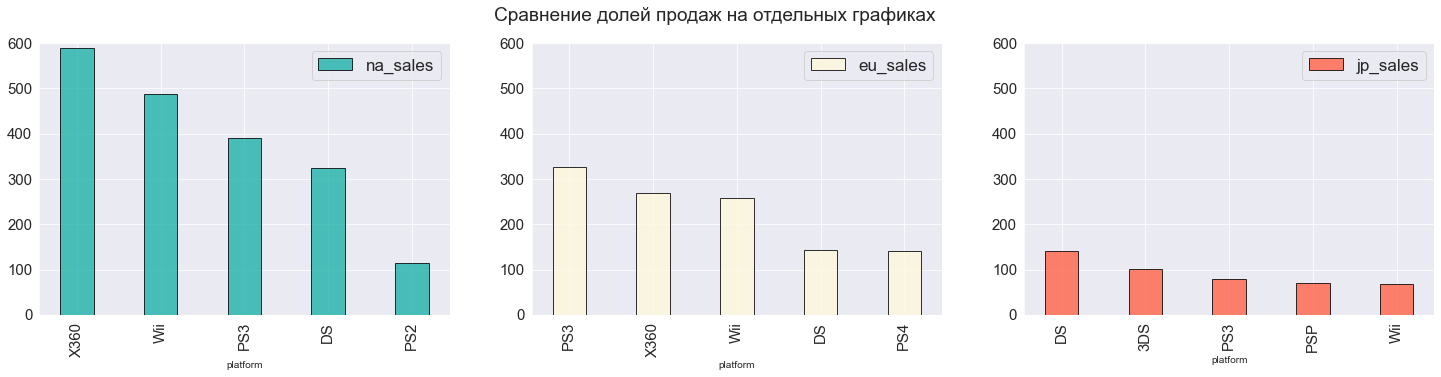

In [42]:
bar_top_5('platform', 600) 

Итог.

<ins>**Опишем сходства и различия долей продаж**</ins>
- Продажи в Северной Америке > Европы > Японии.
- Продажи платформы **DS** в Европе и Японии близки, однако я Японии это самая популярная платформа, а в Европе четвертая.
- Предпочтения в выборе платформы в Северной Америке и Европе сходны, в Японии более популярна платформы на базе **DS** (**DS**, **3DS**) и **PSP** (всё это портативные платформы, видимо, из-за более высокого ритма жизни)
- в Европе более популярны платформы на базе **PS** (**PS3**, **PS4**), в то время, как в США лидирующее место занимает платформа **X360**

<ins>**Вероятные причины**</ins>

- Маркетинг - в Северной Америке самая активная политика продаж.
- Менталитет - к примеру, в Японии Wii (платформа с командными играми 2-4 человека) на последнем месте, следовательно больше индивидуалистов, в то время, как в Северной Америке и Европе она входит в топ 3.
- Ритм жизни - в Японии люди больше всего работают, следовательно меньше играют, а если играют, то на ходу, к примеру, на платформах **DS**, **3DS**, **PSP**, меньше времени на семью и друзей, поэтому Wii не так популярен. 
- Мировоззрение - в Японии в топ 5 входят все японские платформы, а в Северной Америке на первом месте **X360** от американской компании Microsoft, либеральная Европа берет ото всюду лучшее - представлены как американская, так и японские платформы.
- Демография - численность населения Северной Америки > Европы > Японии.

### Самые популярные жанры (топ-5) 

Напомним, с какими данными работаем:
- `genre` — жанр
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)

Посмотрим на самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP).

Вызовем функцию для получения интересующей нас информации в табличном и графическом видах.

,na_sales,eu_sales,jp_sales
genre,,,
Action,530.44,350.7,102.09
Sports,396.64,251.55,48.97
Shooter,373.13,238.89,not top
Misc,285.06,146.88,64.53
Role-Playing,199.63,not top,170.38
Racing,not top,113.39,not top
Platform,not top,not top,35.2


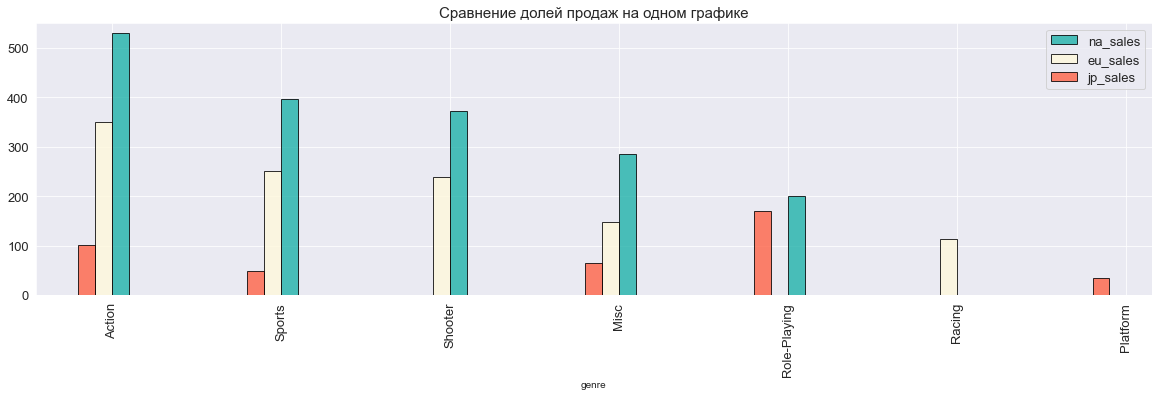

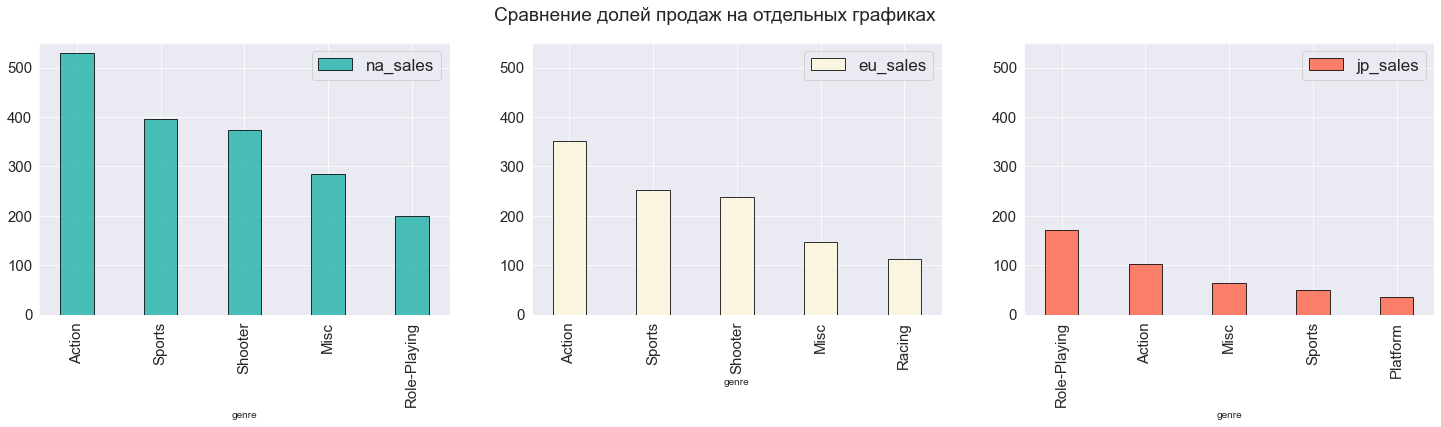

In [43]:
bar_top_5('genre', 550)  

Итог.

<ins>**Опишем сходства и различия**</ins>
- Продажи в Северной Америке > Европы > Японии (неоспоримый факт).
- В Северной Америке и Европе предпочтения по жанрам схожы, за исключением пятой позиции, для Северной Америки - **Role-Playing**, для Европы - **Racing**.
- В Японии лидирует жанр **Role-Playing**, в то время, как в Северной Америке он на последнем месте, а в Европе вовсе не попал в топ-5.
- В Японии непопулярен жанр **Shooter** в отличие от Северной Америки и Европы.
- В Северной Америке, как и в Японии любят жанр **Role-Playing**, но причины, я думаю, разные. Если в Японии очевидные, то в Северной Америке необходимо провести более глубокий социологический анализ.
- В Японии также присутствует жанр **Platform**, непредставленный в топ-5 Северной Америке и Европы.

<ins>**Вероятные причины**</ins>

- Маркетинг - в Северной Америке самая активная политика продаж.
- Менталитет - к примеру, в Японии лидирует жанр **Role-Playing** из-за того, что людям некогда жить своей личной жизнью и играя находу в игры данного жанра они проживают жизнь внутри игры.
- Ритм жизни - наличие в топ-5 Японии жанра **Platform** (лазанье, прыганье по платформам - сходно с играми на Денди, Сеге) говорит о высоком ритме жизни, в игры этого жанра можно сыграть по-быстрому.
- Мировоззрение:
    - отсутствие жанра **Shooter** в топ-5 Японии говорит о том, что в этой стране более миролюбивое население;
    - изучил топ 10 гонщиков Формулы-1 на сайте Википедия - большинство европейцы, этим объясняется любовь Европы к жанру гонки
- Демография - численность населения Северной Америки > Европы > Японии.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Напомним, с какими данными работаем
- `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию:
    - **E** - для всех
    - **E10+** - для всех от 10 лет и старше
    - **M** - для взрослых
    - **T** - подросткам    
    - **unknown** - рейтинг неизвестен
    - **RP** - рейтинг ожидается
    - **EC** - для детей младшего возраста
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)

Посмотрим влияние рейтинга ESRB на продажи в отдельном регионе (NA, EU, JP).

Для начала рассмотрим все рейтинги (`assortment` - количество разных игр)

In [44]:
(df_act.pivot_table(index='rating',
                   aggfunc={'name':'count', 'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
                   .rename(columns={'name':'assortment'}))

,eu_sales,jp_sales,na_sales,assortment
rating,,,,
E,461.09,120.36,796.98,2427
E10+,173.35,36.57,315.40,1277
EC,0.00,0.00,1.32,6
M,398.90,43.79,574.33,1100
RP,0.03,0.00,0.00,1
T,235.44,83.90,424.14,1793
unknown,227.19,276.71,274.50,3730


Т.к. рейтинги **EC** (для детей младшего возраста) и **RP** (рейтинг ожидается) представлены минимальным ассортиментом игр и продажами, в дальшейшем анализе их учитывать не будем. Однако отметим, что в Северной Америке продано 1,32 миллиона копий игр для детей младшего возраста. Предполагаю, что раз рейтинг ESRB - американский, значит в Северной Америке его используют для детей младшего возраста, а в других регионах нет.

Вызовем функцию для получения интересующей нас информации в табличном и графическом видах.

,na_sales,eu_sales,jp_sales
rating,,,
E,796.98,461.09,120.36
M,574.33,398.90,43.79
T,424.14,235.44,83.90
E10+,315.40,173.35,36.57
unknown,274.50,227.19,276.71


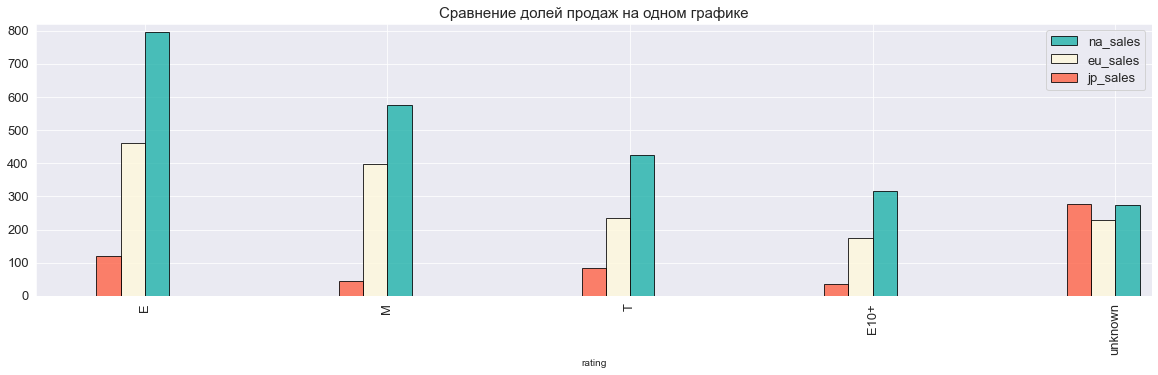

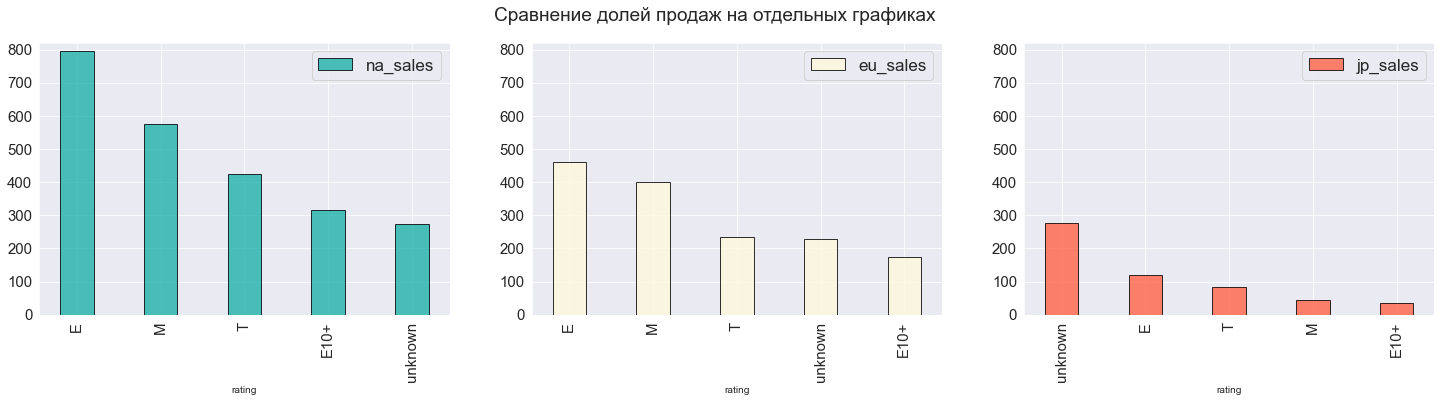

In [45]:
bar_top_5('rating', 820)

Итог.

<ins>**Опишем сходства и различия**</ins>

- Продажи в Северной Америке > Европы > Японии (что и требовалось доказать).
- Во всех регионах рейтинг на продажи влияет, причём, чем большую возрастную аудиторию он охватывает, тем продажи больше, что логично (рейтинг **E** - для всех).
- В Северной Америке и Европе распределение продаж по рейтингу схоже.
- В Японии большинство игр не имеет рейтинга.
- В Японии продажи с рейтингом **T** (подросткам) опережают продажи с рейтингом **М** (для взрослых), в то время, как в Северной Америке и Европе наоборот.
- В США без рейтинга игр меньшинство, в Европе игр без рейтинга больше, чем игр с рейтингом **E10+**
- Рейтинг **E10+** - самый непродаваемый для всех регионов

<ins>**Вероятные причины**</ins>

- Маркетинг - в Северной Америке самая активная политика продаж, в Японии лидируют игры без рейтингов, и, скорее всего, это связано с тем, что в Японии своя система - Computer Entertainment Rating Organization (CERO), и в системе ESRB таким играм рейтинги не проставляются
- Менталитет - большинство игр Японии без рейтинга по нескольким причинам - либо там любят онлайн-игры, на которые не распространяется рейтинг ESRB, либо там более мягкая позиция к наличию рейтинга, о чём в интернете есть соответствующая статья
- Ритм жизни - в Японии игры с рейтингом **T** более популярны игр с рейтингом **M**, т.к. у подростков больше свободного времени, чем у взрослых, в то время как в Северной Америке и Европе более размеренный ритм жизни и там у взрослых больше времени на игры.
- Демография - численность населения Северной Америки > Европы > Японии.
- Ненацеленность на аудиторию - игры рейтинга **E10+** (для всех от 10 лет и старше) вероятно содержат насилие, которое ещё рано детям и сюжет, который уже неинтересен взрослым.
- Мировоззрение - в Северной Америке продаются игры с рейтингом **EC** (для детей младшего возраста) возможно не только потому, что рейтинг американский, но также потому, что в Северной Америке нет границ продаж и они готовы разрабатывать игры даже для младенцев, невзирая на их здоровье, как физическое, так и психологическое.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для наглядности выделим данные в столбце `user_score` в отдельные подвыборки `rating_x_one` и `rating_pc` по платформам **Xbox One** и **PC** соответственно, отрезав пропуски пропуски для корректности выполнения расчётов.

Создадим функцию `selection` для данного действия, т.к. оно будет повторяться, на вход функции подаётся:
- `vyb` - наименование столбца выборки
- `param`- наименование параметра, по которому выполнена выборка

In [46]:
def selection (vyb, param):
    return df_act[(df_act[vyb] == param) & (df_act['user_score']>=0)]['user_score']    

In [47]:
rating_x_one = selection ('platform', 'XOne')
rating_pc = selection ('platform', 'PC')

<ins>**Нулевая гипотеза H₀:**</ins>
- Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.

Это гипотеза о равенстве средних двух генеральных совокупностей по взятым из них выборкам, независящих друг от друга.

<ins>**Альтернативная гипотеза H₁:**</ins>
- Средние пользовательские рейтинги платформ **Xbox One** и **PC** различные.

Проверим средние, дисперсии и размер двух выборок.

Создадим функцию `mean_var_len` для данного действия, т.к. оно будет повторяться, на вход функции подаётся:
- `vyb` - наименование выборки
- `param`- наименование параметра, по которому выполнена выборка

In [48]:
def mean_var_len(vyb, param):
    print (param)
    print ('среднее значение пользовательских рейтингов для', param, ':', vyb.mean().round(2))
    print ('дисперсия пользовательских рейтингов для', param, ':', np.var(vyb, ddof=1).round(2))
    print ('размер выборки для', param, ':', len(vyb))

In [49]:
mean_var_len(rating_x_one, "XOne")
mean_var_len(rating_pc, "PC")

XOne
среднее значение пользовательских рейтингов для XOne : 6.52
дисперсия пользовательских рейтингов для XOne : 1.91
размер выборки для XOne : 182
PC
среднее значение пользовательских рейтингов для PC : 6.83
дисперсия пользовательских рейтингов для PC : 2.32
размер выборки для PC : 615


- Для проверки нулевой гипотезы применим метод `scipy.stats.ttest_ind()`.
- Видим, что дисперсии близки, фактом, что выборки разные по размеру принебрежем, дополнительный параметр `equal_var` не задаём, т.к. считаем, что дисперсии равны.
- Критический уровень статистической значимости примем 0,05 - стандартная величина, значение считаю достаточным, т.к. анализируем не судебные дела и не медицину.
- Если p-value окажется меньше уровня статистической значимости - отвегнем гипотезу.

In [50]:
alpha = .05

results = st.ttest_ind(rating_x_one, 
                       rating_pc)

print('p-значение:', results.pvalue.round(5))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.01435
Отвергаем нулевую гипотезу


Итог.
- Отвергаем нулевую гипотезу, т.к. вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна, ниже критического уровня статистической значимости.
- Принимаем, что cредние пользовательские рейтинги платформ **Xbox One** и **PC** различные.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для наглядности выделим данные в столбце `user_score` в отдельные подвыборки `rating_action` и `rating_sports` по жанрам **Action** и **Sports** соответственно, отрезав пропуски пропуски для корректности выполнения расчётов.

In [51]:
rating_action = selection ('genre', 'Action')
rating_sports = selection ('genre', 'Sports')

<ins>**Нулевая гипотеза H₀:**</ins>
- Средние пользовательские рейтинги жанров **Action** и **Sports** одинаковые.

Это гипотеза о равенстве средних двух генеральных совокупностей по взятым из них выборкам, независящих друг от друга.

<ins>**Альтернативная гипотеза H₁:**</ins>
- Средние пользовательские рейтинги жанров **Action** и **Sports** различные.

Проверим средние, дисперсии и размер двух выборок.

In [52]:
mean_var_len(rating_action, "Action")
mean_var_len(rating_sports, "Sports")

Action
среднее значение пользовательских рейтингов для Action : 6.88
дисперсия пользовательских рейтингов для Action : 1.86
размер выборки для Action : 1324
Sports
среднее значение пользовательских рейтингов для Sports : 6.42
дисперсия пользовательских рейтингов для Sports : 2.73
размер выборки для Sports : 676


- Для проверки нулевой гипотезы применим метод `scipy.stats.ttest_ind()`.
- Видим, что дисперсии близки, фактом, что выборки разные по размеру принебрежем, дополнительный параметр `equal_var` не задаём, т.к. считаем, что дисперсии равны.
- Критический уровень статистической значимости примем 0,05 - стандартная величина, значение считаю достаточным, т.к. анализируем не судебные дела и не медицину.
- Если p-value окажется меньше уровня статистической значимости - отвегнем гипотезу.

In [53]:
alpha = .05

results = st.ttest_ind(
                       rating_action, 
                       rating_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.493183815903372e-11
Отвергаем нулевую гипотезу


Итог.
- Отвергаем нулевую гипотезу, т.к. вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна, ниже критического уровня статистической значимости.
- Принимаем, что cредние пользовательские рейтинги жанров **Action** и **Sports** различные.

## Общий вывод

Для интернет-магазина компьютерных игр «Стримчик» проведен анализ данных и выявлены определяющие успешность игры закономерности на для планируемой на ближайший год кампании.

<ins>**Результаты анализа**</ins> 

<ins>*Количество игр в разные годы:*</ins> 
- до середины 90-х годов кол-во выпускаемых игр было мало и явный прогресс выпуска не наблюдался
- начиная с середины 90-х годов до конца нулевых наблюдается значительный рост выпуска
- с конца нулевых резкий спад

Всё вышеперечисленное связано с развитием и доступностью компьютерных технологий, а также появлением игр на мобильных устройствах.

<ins>*Продажи по платформам:*</ins>
- Примерно за 5 лет появляются новые платформы, а старые исчезают через 5 лет после появления новой (на графике выше это видно по кривым для платформ PS, PS2, PS3).
- Срок жизни платформы около 10 лет.

<ins>*Для прогноза на 2017 год принята выборка с 2006 до 2016 года.*</ins>

<ins>*Потенциально прибыльные платформы:*</ins>
- PS4
- XOne
- 3DS

<ins>*Результаты анализа по графику «ящик с усами» по глобальным продажам игр в разбивке по платформам*</ins>

<center>Для потенциально прибыльных платформ.</center>

- Медиана 0,12 до 0,22 млн проданных копий.
- **XOne** имеет чуть меньше продаж, чем **PS4**, однако медиана больше и выбросов меньше, выглядит <ins>перспективнее</ins>. **3DS** уступает и в числе продаж и в медианном значении.

<center>Для самых прибыльных платформ.</center>

- Медианы от 0,11 до 0,28 млн проданных копий.
- Самые успешные за актуальный период **X360** и **PS3**. **X360** выглядит наиболее <ins>прибыльным</ins>.
- **PS4** - третье место по прибыльности.

<ins>*Влияние отзывов на продажи платформ*</ins>

- Для всех платформ оценка критиков больше влияет на продажи (чем оценка пользователей) - чем она выше, тем продаж больше.
- Степень влияния (как положительного, так и отрицательного) на продажи оценки пользователей у разных платформ разная.
- Отрицательная корреляция близка к нулю - соответственно для **PS4**, **PC**, **XOne** оценка пользователей не влияет на продажи совсем.
- Для всех платформ с положительной корреляцией оценки пользователей и продаж зависимость ниже средней, оценка пользователей в данном случае незначительно влияет на продажи.
- Для всех платформ, кроме **Wii** и **DS**, корреляция оценки критиков и продаж средняя и влияет на продажи, у **Wii** и **DS** - ниже средней и влияет меньше.

<ins>*Распределение игр по жанрам*</ins>

Самые прибыльные жанры:

- 1) Action
- 2) Sports
- 3) Shooter

Среди них явно выделяется жанр Action - самый прибыльный.

Жанры с низкими продажами:
- 1) Strategy
- 2) Puzzle
- 3) Adventure

Среди них явно выделяется жанр Adventure - самый прибыльный из жанров с низкими продажами.

<ins>*Портрет пользователя каждого региона.*</ins>

<center>Самые популярные платформы (топ-5).</center>

Сходства и различия долей продаж.
- Продажи в Северной Америке > Европы > Японии.
- Продажи платформы **DS** в Европе и Японии близки, однако я Японии это самая популярная платформа, а в Европе четвертая.
- Предпочтения в выборе платформы в Северной Америке и Европе сходны, в Японии более популярна платформы на базе **DS** (**DS**, **3DS**) и **PSP** (всё это портативные платформы, видимо, из-за более высокого ритма жизни)
- в Европе более популярны платформы на базе **PS** (**PS3**, **PS4**), в то время, как в США лидирующее место занимает платформа **X360**

Вероятные причины

- Маркетинг - в Северной Америке самая активная политика продаж.
- Менталитет - к примеру, в Японии Wii (платформа с командными играми 2-4 человека) на последнем месте, следовательно больше индивидуалистов, в то время, как в Северной Америке и Европе она входит в топ 3.
- Ритм жизни - в Японии люди больше всего работают, следовательно меньше играют, а если играют, то на ходу, к примеру, на платформах **DS**, **3DS**, **PSP**, меньше времени на семью и друзей, поэтому Wii не так популярен. 
- Мировоззрение - в Японии в топ 5 входят все японские платформы, а в Северной Америке на первом месте **X360** от американской компании Microsoft, либеральная Европа берет ото всюду лучшее - представлены как американская, так и японские платформы.
- Демография - численность населения Северной Америки > Европы > Японии.

<center>Самые популярные жанры (топ-5).</center>

Сходства и различия
- Продажи в Северной Америке > Европы > Японии (неоспоримый факт).
- В Северной Америке и Европе предпочтения по жанрам схожы, за исключением пятой позиции, для Северной Америки - **Role-Playing**, для Европы - **Racing**.
- В Японии лидирует жанр **Role-Playing**, в то время, как в Северной Америке он на последнем месте, а в Европе вовсе не попал в топ-5.
- В Японии непопулярен жанр **Shooter** в отличие от Северной Америки и Европы.
- В Северной Америке, как и в Японии любят жанр **Role-Playing**, но причины, я думаю, разные. Если в Японии очевидные, то в Северной Америке необходимо провести более глубокий социологический анализ.
- В Японии также присутствует жанр **Platform**, непредставленный в топ-5 Северной Америке и Европы.

Вероятные причины

- Маркетинг - в Северной Америке самая активная политика продаж.
- Менталитет - к примеру, в Японии лидирует жанр **Role-Playing** из-за того, что людям некогда жить своей личной жизнью и играя находу в игры данного жанра они проживают жизнь внутри игры.
- Ритм жизни - наличие в топ-5 Японии жанра **Platform** (лазанье, прыганье по платформам - сходно с играми на Денди, Сеге) говорит о высоком ритме жизни, в игры этого жанра можно сыграть по-быстрому.
- Мировоззрение:
    - отсутствие жанра **Shooter** в топ-5 Японии говорит о том, что в этой стране более миролюбивое население;
    - изучил топ 10 гонщиков Формулы-1 на сайте Википедия - большинство европейцы, этим объясняется любовь Европы к жанру гонки
- Демография - численность населения Северной Америки > Европы > Японии.

<center>Влияние рейтинга ESRB на продажи в отдельном регионе</center>

Сходства и различия

- Продажи в Северной Америке > Европы > Японии (что и требовалось доказать).
- Во всех регионах рейтинг на продажи влияет, причём, чем большую возрастную аудиторию он охватывает, тем продажи больше, что логично (рейтинг **E** - для всех).
- В Северной Америке и Европе распределение продаж по рейтингу схоже.
- В Японии большинство игр не имеет рейтинга.
- В Японии продажи с рейтингом **T** (подросткам) опережают продажи с рейтингом **М** (для взрослых), в то время, как в Северной Америке и Европе наоборот.
- В США без рейтинга игр меньшинство, в Европе игр без рейтинга больше, чем игр с рейтингом **E10+**
- Рейтинг **E10+** - самый непродаваемый для всех регионов

Вероятные причины

- Маркетинг - в Северной Америке самая активная политика продаж.
- Менталитет - большинство игр Японии без рейтинга по нескольким причинам - либо там любят онлайн-игры, на которые не распространяется рейтинг ESRB, либо там более мягкая позиция к наличию рейтинга, о чём в интернете есть соответствующая статья
- Ритм жизни - в Японии игры с рейтингом **T** более популярны игр с рейтингом **M**, т.к. у подростков больше свободного времени, чем у взрослых, в то время как в Северной Америке и Европе более размеренный ритм жизни и там у взрослых больше времени на игры.
- Демография - численность населения Северной Америки > Европы > Японии.
- Ненацеленность на аудиторию - игры рейтинга **E10+** (для всех от 10 лет и старше) вероятно содержат насилие, которое ещё рано детям и сюжет, который уже неинтересен взрослым.
- Мировоззрение - в Северной Америке продаются игры с рейтингом **EC** (для детей младшего возраста) возможно не только потому, что рейтинг американский, но также потому, что в Северной Америке нет границ продаж и они готовы разрабатывать игры даже для младенцев, невзирая на их здоровье, как физическое, так и психологическое.

<ins>*Результаты проверки гипотез.*</ins>
- Средние пользовательские рейтинги платформ **Xbox One** и **PC** различные.
- Средние пользовательские рейтинги жанров **Action** и **Sports** различные.